In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
def pie_chart(data, title):
  plot_data = data['Class'].value_counts()
  colors = ['#FFB400', '#FF7C15', '#ED4672']
  explode = [0.12,0, 0.1]
  labels = ['win', 'loss', 'draw'] 
  plt.pie(plot_data, colors=colors, explode=explode, autopct='%1.1f%%', labels = labels)
  plt.title(title)
  plt.ylabel('')
  plt.show()

# Učitavanje podataka

In [18]:
atribute_names=[]
board = ['a','b','c','d','e','f','g']
for i in board:
    for j in range(6):
        atribute_names.append(i + str(j+1))
atribute_names += ['Class']
data = pd.read_csv('../data/connect-4.data', names = atribute_names)
data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win


# Analiza nedostajućih vrednosti

In [19]:
data.isna().any().any()

False

Kako nema nedostajućih vrednosti, možemo nastaviti dalji rad sa nepromenjenom bazom. Ali možemo da enkodiramo igrače i shode kako bi rad bio lakši. Prvi igrač će biti 1, drugi -1, a prazno polje će biti 0. Pobedu prvog igrača ćemo označiti s 1, poraz s -1, a nerešeno sa 0.

In [20]:
data_players = {'x':1, 'o': -1, 'b':0, 'win':1, 'loss':-1, 'draw':0}
for col in data.columns:
    data[col] = data[col].map(data_players, na_action='ignore')

In [21]:
data

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,1,1,0,0,0,0,-1,1,-1,0,...,0,0,0,-1,-1,1,0,0,0,-1
67553,1,1,0,0,0,0,-1,0,0,0,...,0,0,0,-1,1,-1,-1,1,0,0
67554,1,1,0,0,0,0,-1,-1,0,0,...,0,0,0,-1,1,1,-1,0,0,-1
67555,1,-1,0,0,0,0,-1,0,0,0,...,0,0,0,-1,1,-1,1,1,0,0


In [22]:
data.describe()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
count,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,...,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000,67557.000000
mean,0.028524,0.001835,-0.004826,-0.003538,-0.000266,-0.003123,0.088710,-0.002235,-0.007238,-0.003952,...,-0.003878,-0.002309,-0.000770,-0.000918,-0.005018,-0.003020,-0.004648,-0.003242,-0.000829,0.412067
std,0.793350,0.598167,0.425350,0.296529,0.184194,0.087425,0.818452,0.624853,0.442058,0.306586,...,0.200545,0.104494,0.036084,0.748298,0.536590,0.358602,0.219489,0.111925,0.036894,0.857177
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analiza raspodele klasa

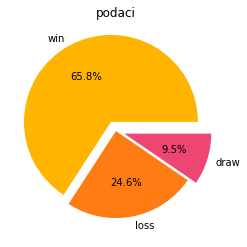

In [23]:
pie_chart(data, 'podaci')

Zbog prirode podataka i zadataka koje želimo da odradimo, nema smisla balansirati klase. Želimo da modeli imaju pravilnu sliku o raspodeli ishoda u svim stanjima igre i ne možemo ni jedno od njih zanemariti.

# Analiza koorelacije popunjenih pozicija i ishoda

<AxesSubplot:>

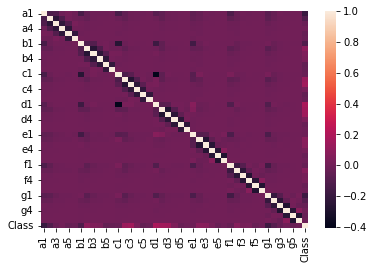

In [24]:
sns.heatmap(data.corr())

In [25]:
data.corr()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
a1,1.000000,-0.130058,-0.113380,-0.011967,0.009169,-0.018137,-0.140839,-0.043826,-0.012200,-0.009152,...,-0.009260,-0.002777,-0.004921,-0.079571,-0.037843,-0.005369,-0.009865,-0.002793,-0.005261,-0.198234
a2,-0.130058,1.000000,-0.245830,-0.121389,0.005378,-0.018855,-0.024007,-0.045335,-0.012377,-0.007951,...,-0.005987,-0.003248,-0.001306,-0.068353,-0.034975,-0.012810,-0.005121,-0.003891,-0.001273,-0.109275
a3,-0.113380,-0.245830,1.000000,-0.226993,-0.106198,0.023877,-0.000386,-0.012349,-0.005145,-0.003211,...,-0.003343,-0.000917,-0.000242,-0.027639,-0.013337,-0.003298,-0.003094,-0.000950,-0.000255,-0.027066
a4,-0.011967,-0.121389,-0.226993,1.000000,-0.235259,0.001287,-0.005111,-0.008032,-0.003244,-0.002271,...,-0.001724,-0.000264,-0.000255,-0.010021,-0.010066,-0.003302,-0.001617,-0.000346,-0.000268,0.000960
a5,0.009169,0.005378,-0.106198,-0.235259,1.000000,-0.212394,-0.008582,-0.006307,-0.001660,-0.000019,...,-0.000028,-0.000032,-0.000031,-0.010849,-0.006304,-0.001581,-0.000031,-0.000042,-0.000033,-0.040369
a6,-0.018137,-0.018855,0.023877,0.001287,-0.212394,1.000000,-0.002127,-0.002567,-0.000585,-0.000461,...,-0.000691,-0.000789,-0.000762,-0.004795,-0.002543,-0.000301,-0.000757,-0.001035,-0.000803,-0.029442
b1,-0.140839,-0.024007,-0.000386,-0.005111,-0.008582,-0.002127,1.000000,-0.115245,-0.099322,-0.006921,...,-0.009448,-0.004528,-0.005206,0.005233,-0.028276,-0.012453,-0.004874,-0.006718,-0.005408,-0.114877
b2,-0.043826,-0.045335,-0.012349,-0.008032,-0.006307,-0.002567,-0.115245,1.000000,-0.261093,-0.115872,...,-0.005739,-0.003706,-0.001389,-0.078168,-0.040738,-0.010996,-0.006336,-0.002220,-0.000722,0.096210
b3,-0.012200,-0.012377,-0.005145,-0.003244,-0.001660,-0.000585,-0.099322,-0.261093,1.000000,-0.236237,...,-0.003489,-0.001003,-0.000349,-0.030673,-0.014506,-0.005460,-0.005076,-0.001671,-0.000368,0.043264
b4,-0.009152,-0.007951,-0.003211,-0.002271,-0.000019,-0.000461,-0.006921,-0.115872,-0.236237,1.000000,...,-0.001694,-0.000285,-0.000275,-0.011823,-0.009928,-0.003071,-0.001813,-0.000373,-0.000290,0.032276


Vidimo da nema značajne koorelacija između polja i ishoda igre, pa ćemo zadržati sve atribute onakve kakvi su.

# Eksportovanje podataka za klasterovanje

In [28]:
y = data['Class']
X = data.drop('Class', axis = 1)
data.to_csv(r'data.csv', index=False)
X.to_csv(r'X.csv', index=False)
y.to_csv(r'y.csv', index= False)

# Podela podataka za klasifikovanje

In [29]:
atribute_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
12496,1,-1,-1,0,0,0,1,0,0,0,...,0,0,0,0,-1,1,0,0,0,0
39173,0,0,0,0,0,0,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
39670,0,0,0,0,0,0,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21723,-1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49634,-1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,-1,-1,0,0,0,0


# Eksportovanje podataka

In [30]:
X_train.to_csv(r'X_train.csv', index=False)
X_test.to_csv(r'X_test.csv', index=False)
y_train.to_csv(r'y_train.csv', index=False)
y_test.to_csv(r'y_test.csv', index=False)